# Basis Analysis

Analisa pada dataset pesanan, pelanggan, pembayaran, produk, dan ulasan.

- Analisis berdasarkan Periode Pembelian
- Analisis berdasarkan Provinsi Pelanggan
- Analisis berdasarkan Jenis Pembayaran
- Analisis berdasarkan Kategori Produk
- Analisis berdasarkan Skor Ulasanor Ulasan

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
mpl.rc('font', family='Calibri')
mpl.rc('axes', unicode_minus=False)


In [2]:
# plot functions
def format_spines(ax, right_border=True):
    """
    this function sets up borders from an axis and personalize colors
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    """
    this function plots data setting up frequency and percentage in a count plot;
    this also sets up borders and personalization
    """    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting up borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()

def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    """
    this function plots data setting up frequency and percentage in a bar plot; 
    this algo sets up borders and personalization
    """
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=13, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()
    
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    this function computes working days between two date columns in a dataframe
    """
    # Computing difference between dates
    time_list = []
    idx = 0
    dates = df[date_col1].values.astype('datetime64[D]')
    second_dates = df[date_col2].values.astype('datetime64[D]')
    for date in dates:
        second_date = second_dates[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adding to a dataframe and dropping null values
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

def communicate_params(frete, entrega, estimativa):
    """
    this function assists the analysis by customer state and plots usefull information
    in the first row of an axis
    """
    # Communicating mean freight value
    axs[0, 0].text(0.5, 0.12, str(f'Mean Freight Value \nR${frete:.2f}'),
                   fontsize=13, ha='center')
    axs[0, 0].axis('off')
    
    # Communicating mean delivery time
    axs[0, 1].text(0.5, 0.12, 
                   str(f'Mean Delivery Time \n{int(entrega)} working days.'),
                   fontsize=13, ha='center')
    axs[0, 1].axis('off')
    
    # Communicating difference between delivery time and estimated time
    if mean_diff_estimative > 0:
        inf = 'before'
    else:
        inf = 'after'
    text_diff_estimative = f'On average, orders are delivered \n{int(estimativa)} \
working days \n{inf} estimated time.'
    axs[0, 2].text(0.5, 0.10, 
                   str(text_diff_estimative), fontsize=13, ha='center')
    axs[0, 2].axis('off')
    
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False):
    """
    this function is used to answear comparative questions in plots (top 5 and last 5)
    """
    # Setting up axis
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # First step: plotting top 5 from an attribute
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    
    # Second step: plotting last 5 from an attribute
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Higher', 'Lower'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)

## Exploring Data

In [4]:
# Reading all datasets
df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')

In [21]:
dataframes = {
    'Customers': df_customers,
    'Geolocation': df_geolocation,
    'Orders': df_orders,
    'Items': df_items,
    'Payments': df_payments,
    'Reviews': df_reviews,
    'Products': df_products,
    'Sellers': df_sellers
}

for df_name, df in dataframes.items():
    print(f'{df_name}')
    print(f'{list(df.columns)}\n')

Customers
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_year', 'order_purchase_month', 'order_purchase_dayofweek']

Items
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',

### Null Data

In [20]:
# Counting null data in datasets with True results in task above
for df_name, df in dataframes.items():
    if df.isnull().any().any():
        print(f'Dataset: {df_name}\n')
        print(f'{df.isnull().sum()}\n')

Dataset: Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_purchase_year                 0
order_purchase_month                0
order_purchase_dayofweek            0
dtype: int64

Dataset: Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm              

Null data in Orders dataset are from:

- Orders without approval date;
    - Orders that weren't delivered to the carrier;
    - Orders that weren't delivered to the customer.

- Null data in Reviews dataset are from:
    * Orders without comments;
    * Comments without title;

- Null data in Products dataset are from:
    * Products without categories, with no name information, description, photos and attributes.

In [19]:
# Data type
for df_name, df in dataframes.items():
    print(f'Dataset: {df_name}\n')
    print(f'{df.dtypes}\n')

Dataset: Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Dataset: Geolocation

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Dataset: Orders

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_purchase_year                       int32
order_purchase_month                      int32
order_purchase_dayofweek                  int32
dtype: object

In [8]:
# Change columns to datetime in orders dataset
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Data type
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

## Analysis by Purchase Period

In [29]:
# Handle type data yang tidak sesuai
lists = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for cols in lists:
    df_orders[cols] = pd.to_datetime(df_orders[cols])  
    
# Purchase Year
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].dt.year

# Purchase Month
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].dt.month

# Purchase Day of Week
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].dt.dayofweek


In [15]:
print(f'First observation was in: {df_orders["order_purchase_timestamp"].min()}')
print(f'Last observation was in: {df_orders["order_purchase_timestamp"].max()}')


First observation was in: 2016-09-04 21:15:19
Last observation was in: 2018-10-17 17:30:18


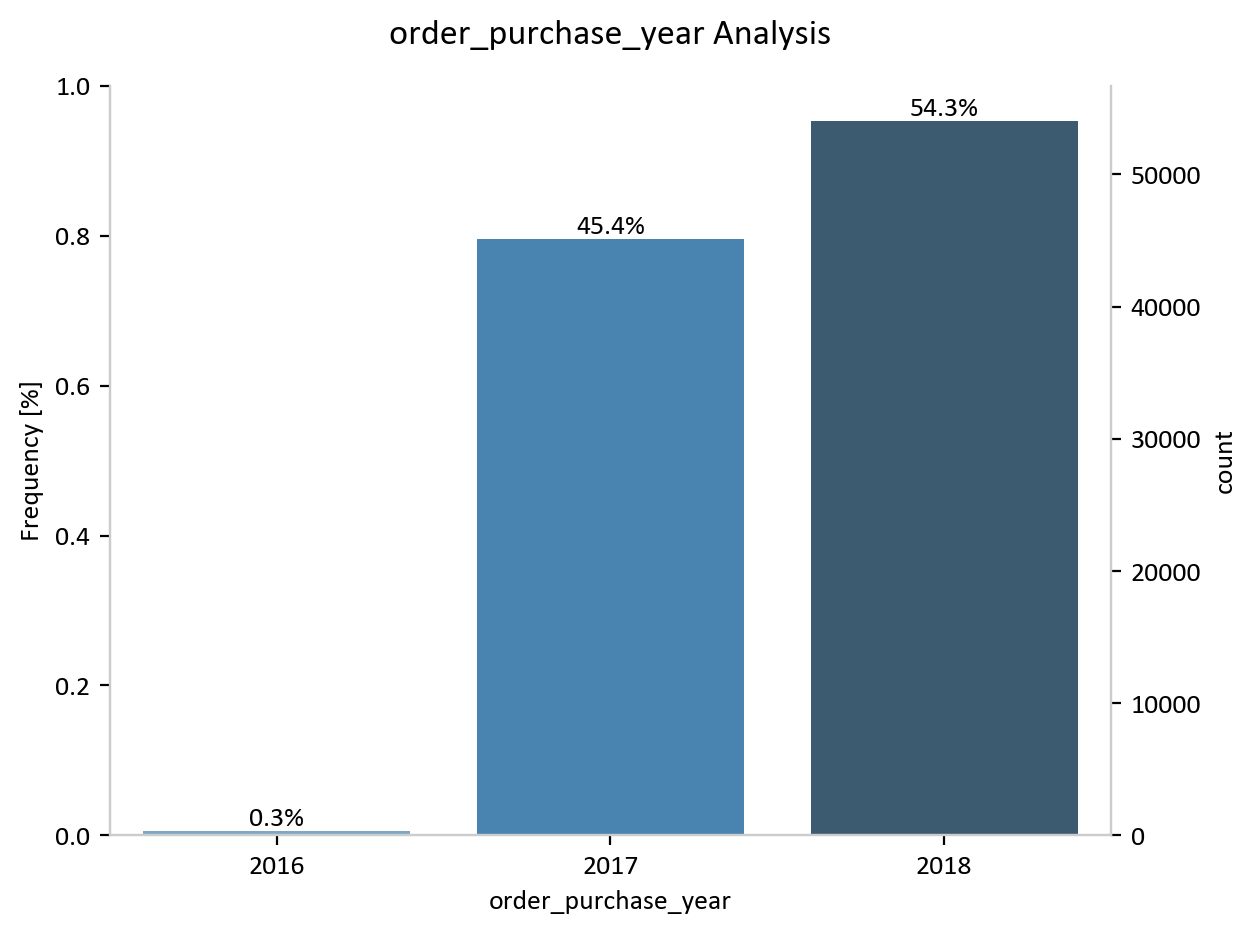

In [30]:
# Counting online sell by year
count_plot(feature='order_purchase_year', df=df_orders)
plt.show()


In [32]:
# Merging items dataset
df_orders_items = df_orders.merge(df_items, on='order_id', how='inner')

# Creating new column with item value + freight value
df_orders_items['total_sales'] = df_orders_items['price'] + df_orders_items['freight_value']

df_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_sales
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,1,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,5,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,1,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62


In [38]:
# Grouping by annual and monthly sales
df_sales = df_orders_items.groupby(['order_purchase_year', 'order_purchase_month'], 
                         as_index=False).agg({'total_sales': 'sum'}).loc[:, ['order_purchase_year', 'order_purchase_month', 'total_sales']]

df_sales_2016 = df_sales[df_sales['order_purchase_year']==2016]
df_sales_2017 = df_sales[df_sales['order_purchase_year']==2017]
df_sales_2018 = df_sales[df_sales['order_purchase_year']==2018]

In [42]:
# Define a function to fill missing months in a DataFrame
def fill_missing_months(df, year):
    # Create a DataFrame with all months in the year
    all_months = pd.DataFrame({'order_purchase_month': np.arange(1, 13)})
    
    # Merge the DataFrame with all months with the original DataFrame
    merged_df = pd.merge(all_months, df, on='order_purchase_month', how='left')
    
    # Fill missing values (NaN) in 'total_sales' column with 0
    merged_df['total_sales'] = merged_df['total_sales'].fillna(0)
    
    # Add 'order_purchase_year' column
    merged_df['order_purchase_year'] = year
    
    return merged_df.astype(int)

# Assuming df_sales_2016, df_sales_2017, and df_sales_2018 are DataFrames for each year
grouped_dfs = [df_sales_2016, df_sales_2017, df_sales_2018]
years = [2016, 2017, 2018]

# Fill missing months for each DataFrame
filled_dfs = [fill_missing_months(df, year) for df, year in zip(grouped_dfs, years)]

# Update the original DataFrames
df_sales_2016, df_sales_2017, df_sales_2018 = filled_dfs

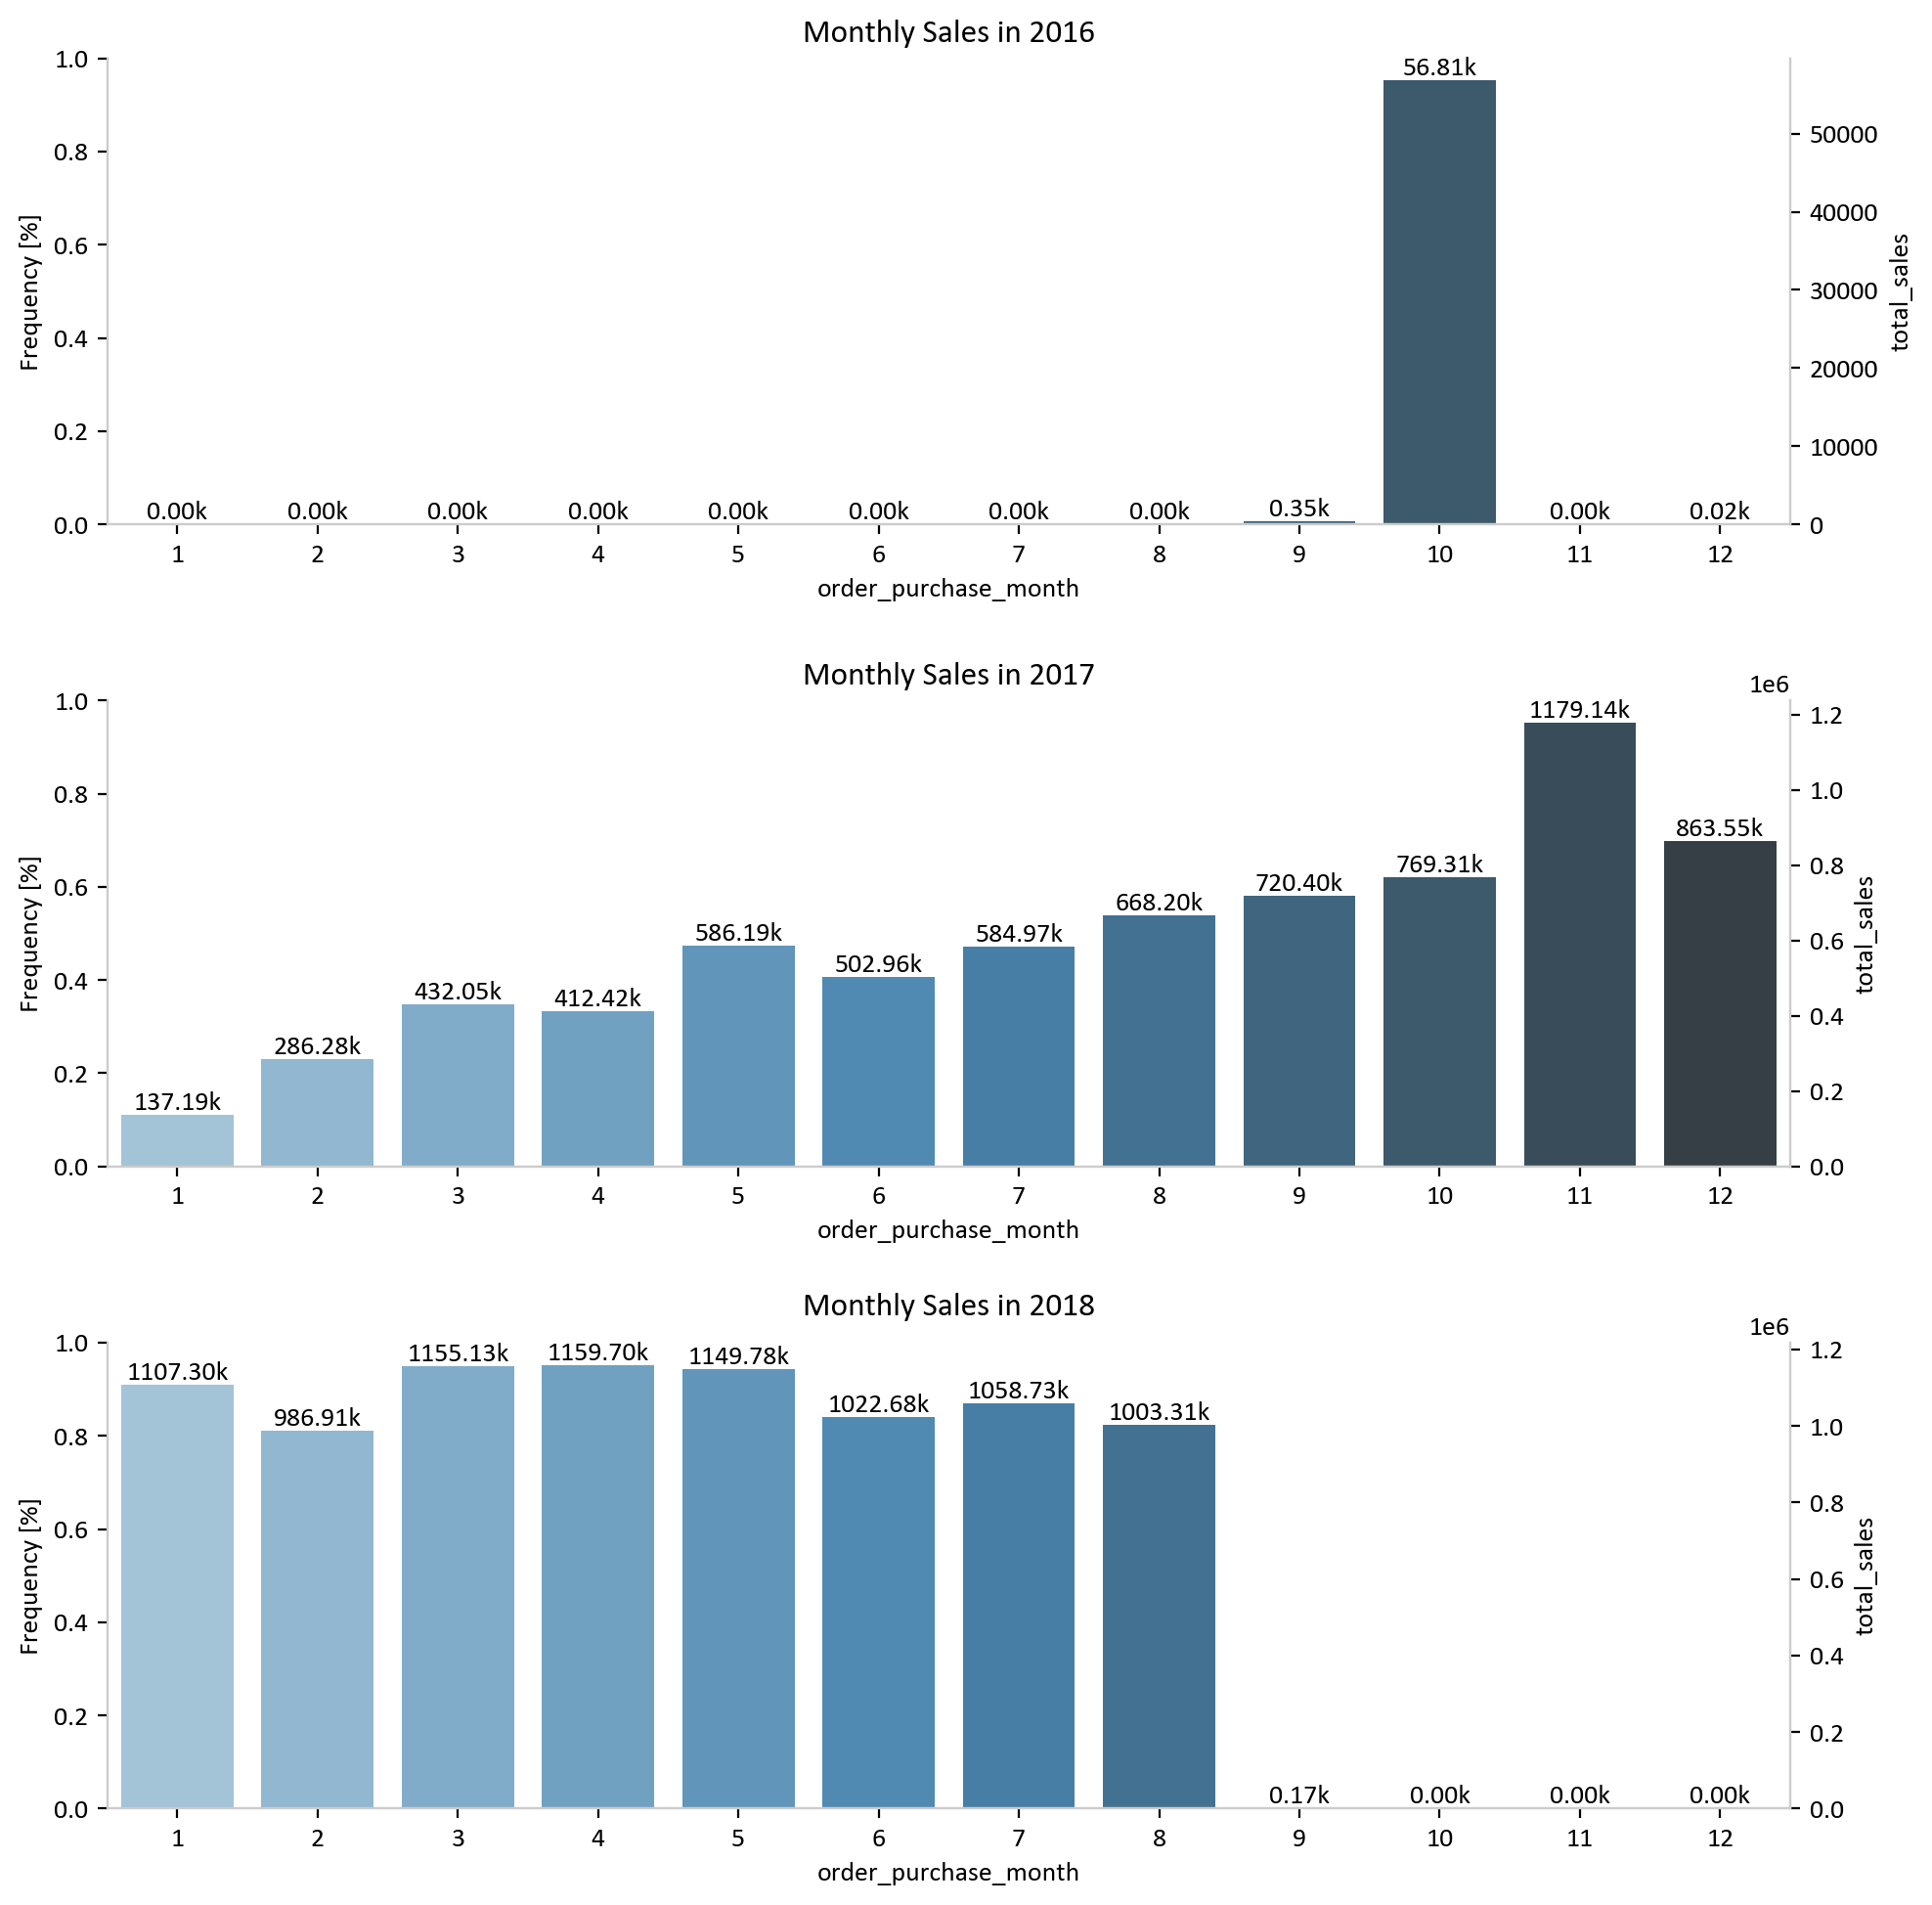

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2018, ax=axs[2], value=True)
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
axs[2].set_title('Monthly Sales in 2018', pad=10)
plt.show()

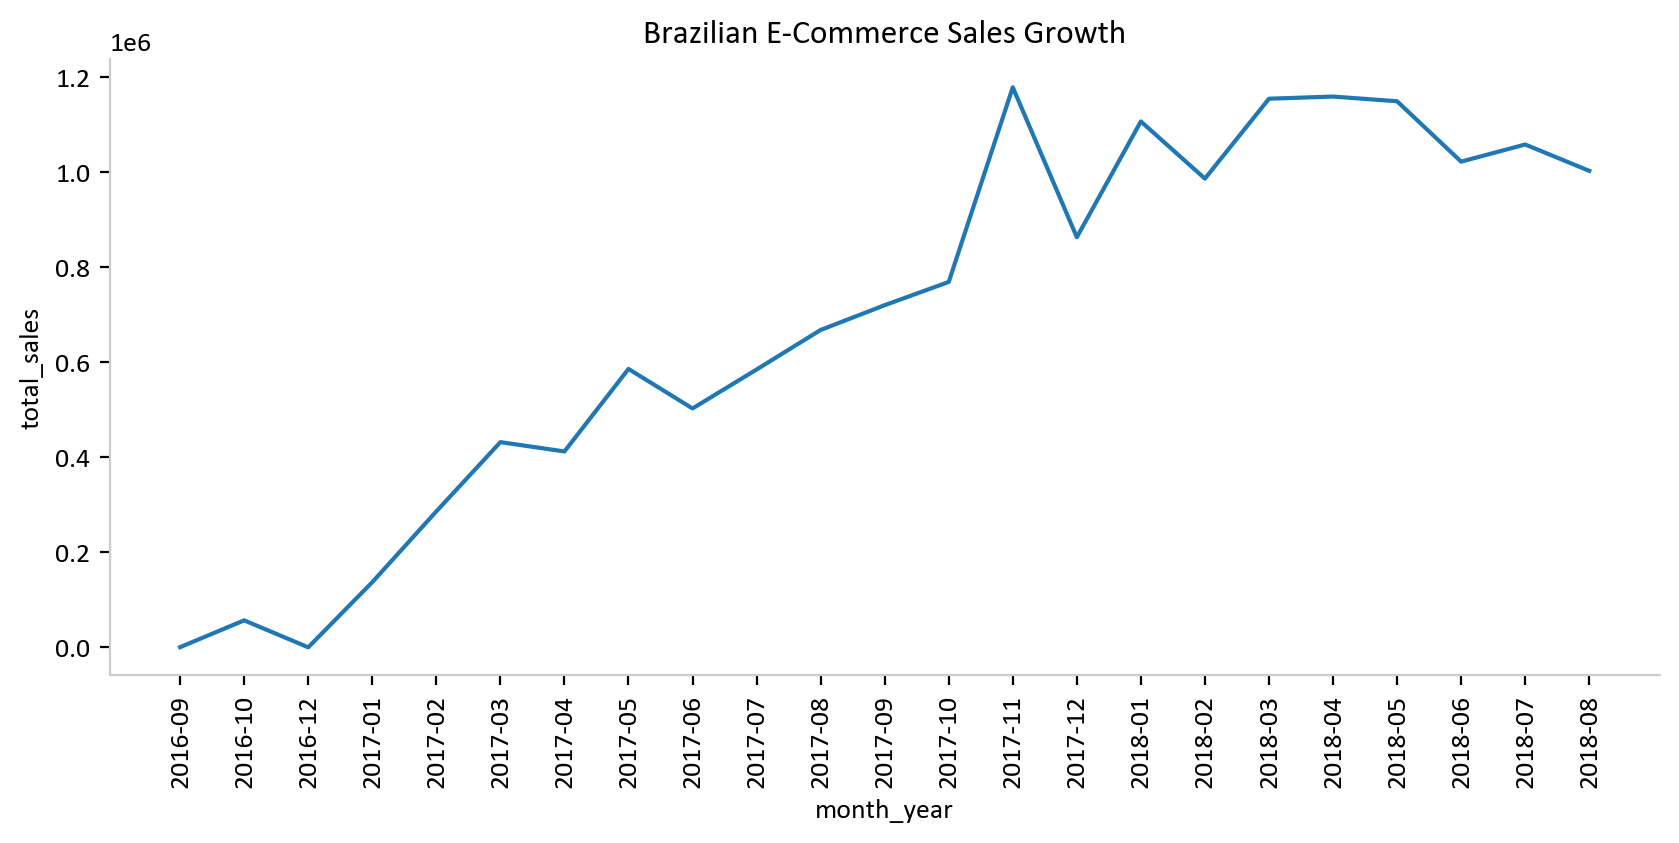

In [45]:
# Changing the month attribute for correct ordenation
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Creating new year-month column
df_sales['month_year'] = df_sales['order_purchase_year'].astype(str) + '-' + \
df_sales['order_purchase_month'].astype(str)
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(int)

# PLotting
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='month_year', y='total_sales', data=df_sales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Brazilian E-Commerce Sales Growth')
plt.show()



Grafik menunjukkan bahwa total penjualan terus meningkat.

Bandingkan total penjualan Brazilian E-Commerce in 2017 and 2018.

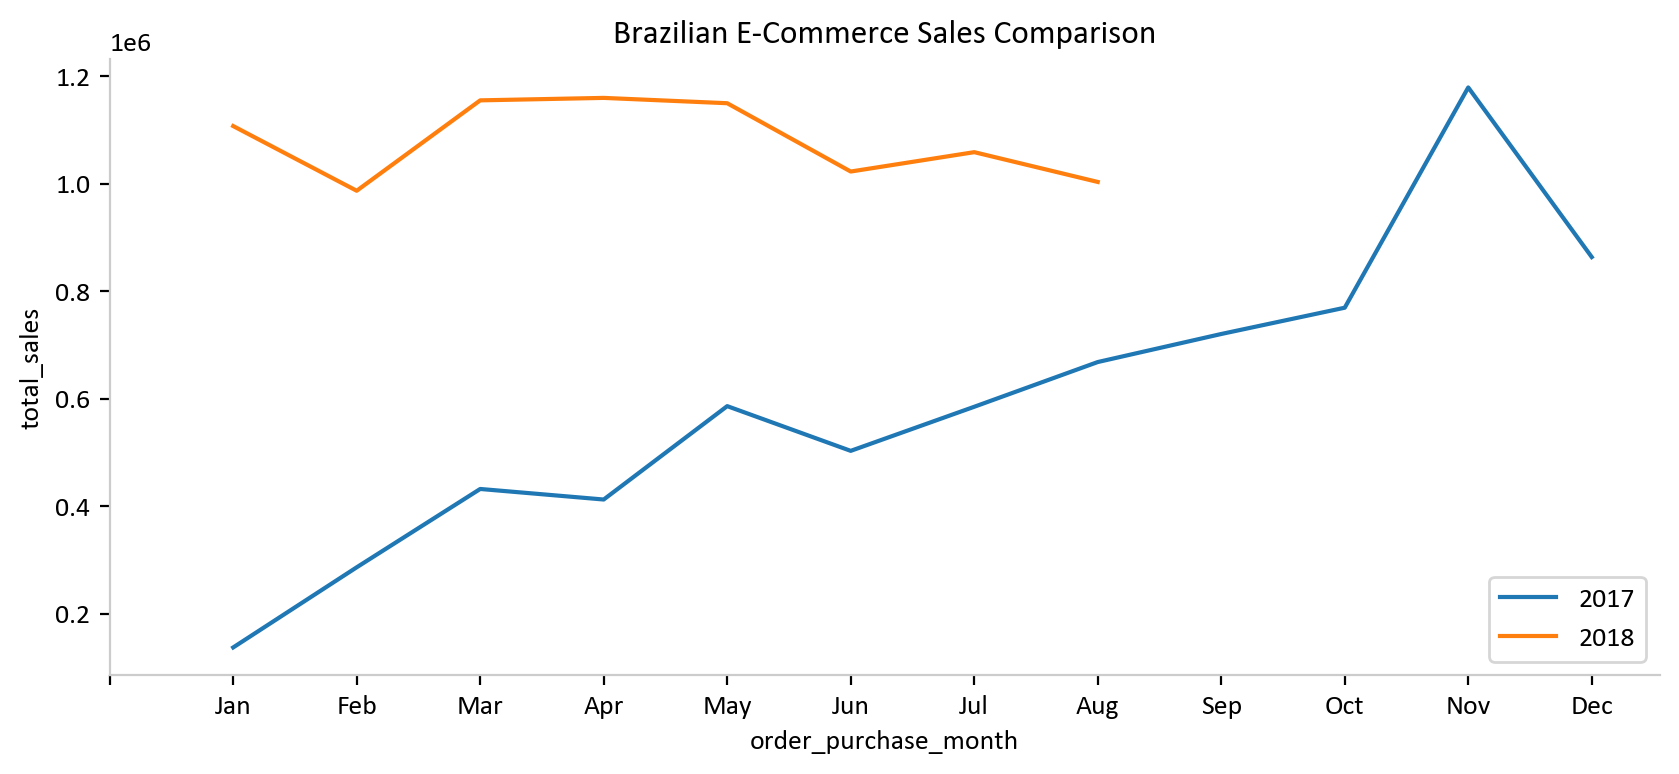

In [46]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='total_sales', 
                  data=df_sales_2018.iloc[:-4, :], label='2018')
format_spines(ax, right_border=False)
ax.set_title('Brazilian E-Commerce Sales Comparison')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
                           'Oct', 'Nov', 'Dec'])
plt.show()


Now let's take a look at total sales by day of week in the last three years.

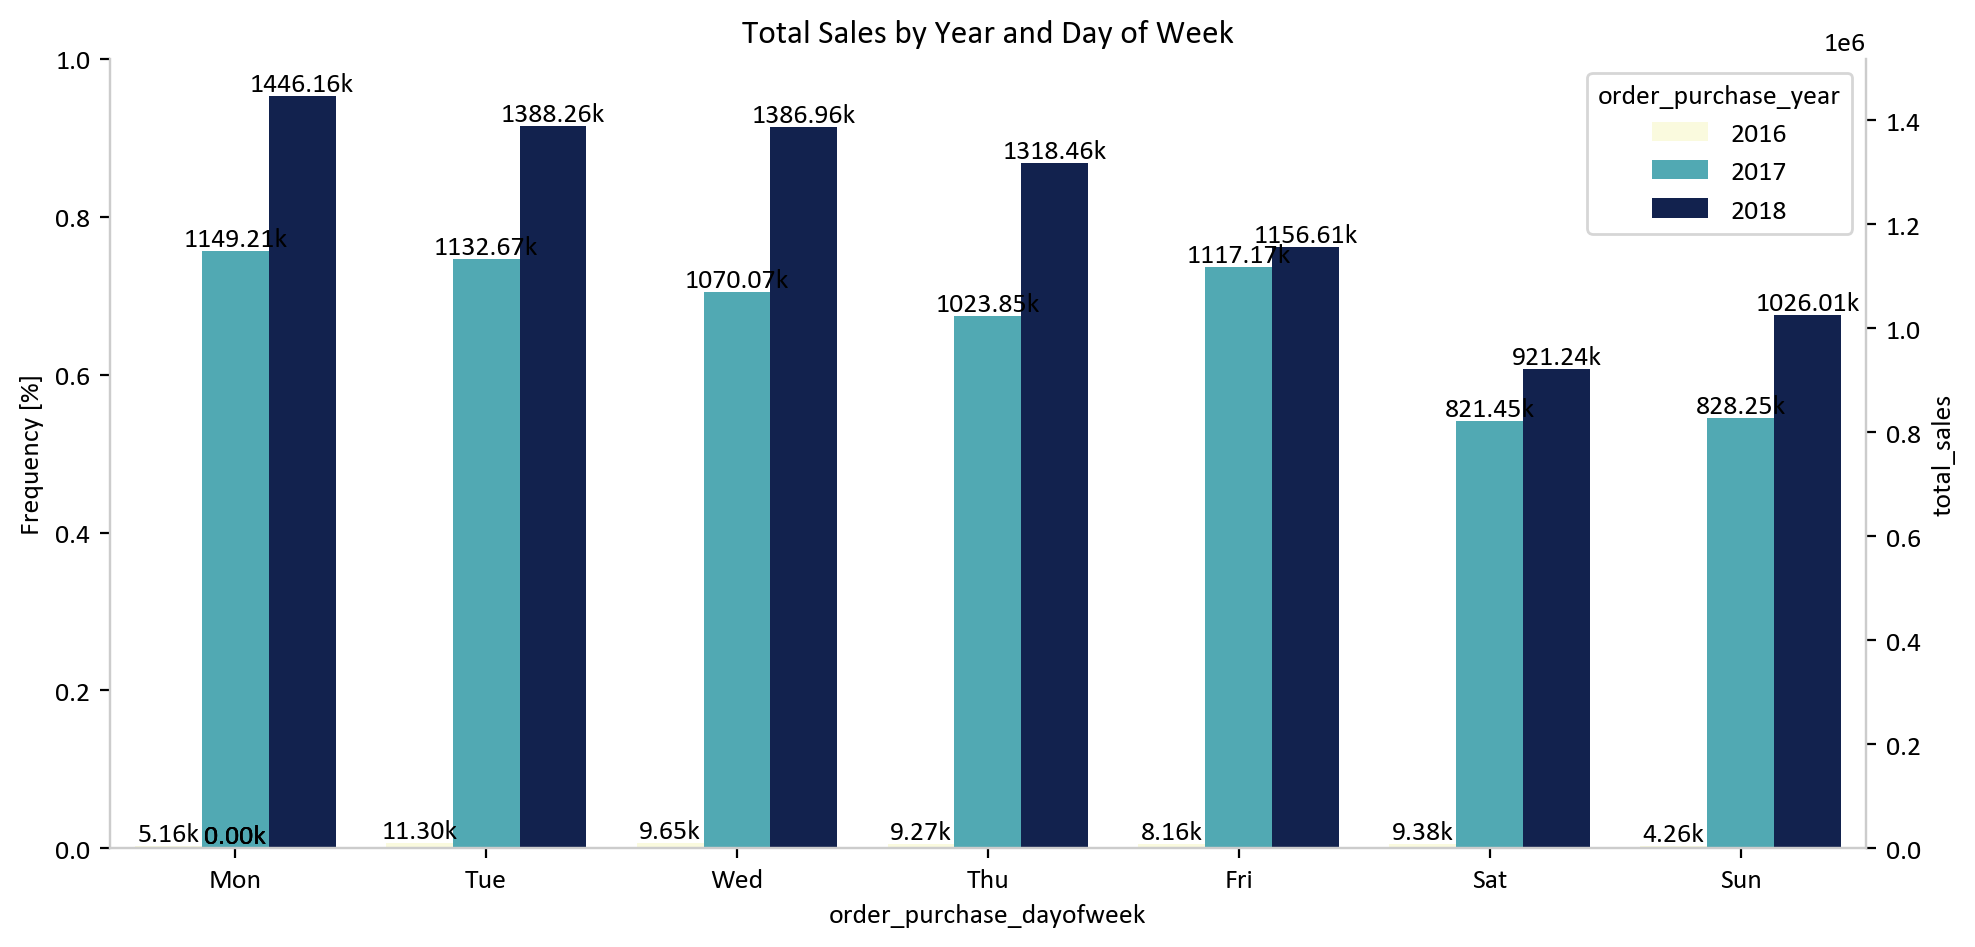

In [51]:
df_sales_dow = df_orders_items.groupby(['order_purchase_year', 'order_purchase_dayofweek'], 
                        as_index=False).agg({'total_sales': 'sum'})

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot(x='order_purchase_dayofweek', y='total_sales', hue='order_purchase_year', 
         df=df_sales_dow, colors='YlGnBu', value=True)
ax.set_title('Total Sales by Year and Day of Week')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


Grafik menunjukkan bahwa total penjualan pada tahun 2018 lebih besar daripada pada tahun 2017.

### Analysis by Customer State

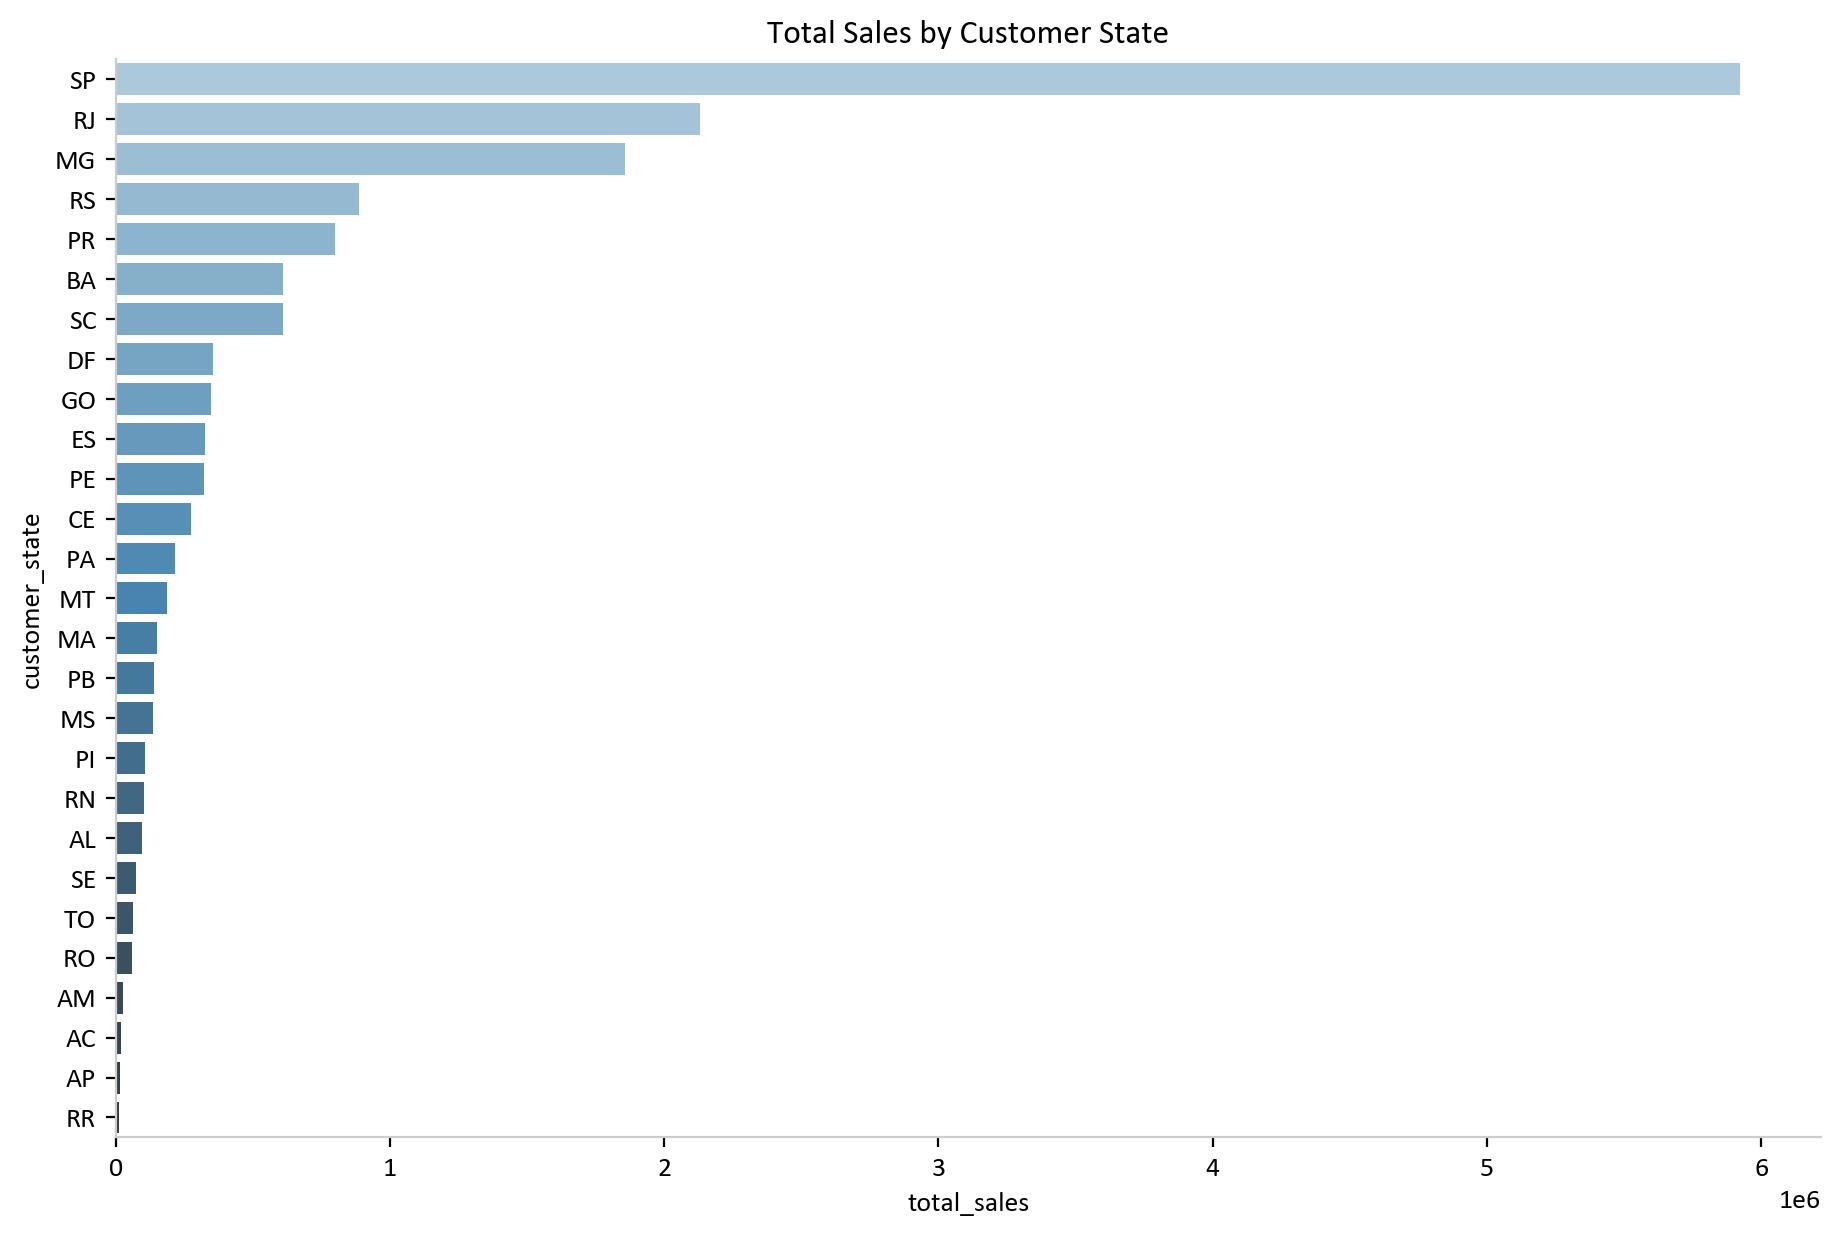

In [60]:
# Merging customer dataset
df_sales_customer = df_orders_items.merge(df_customers, on='customer_id', how='inner')

# Grouping by customer state
df_sales_state = df_sales_customer.groupby(['customer_state'], 
                                          as_index=False).agg({'total_sales': 'sum', 'freight_value': 'sum'})

df_sales_state.sort_values(by='total_sales', ascending=False, inplace=True)


fig, ax = plt.subplots(figsize = (11, 7))
sns.barplot(x='total_sales', y='customer_state', data= df_sales_state, palette='Blues_d')

format_spines(ax, right_border=False)
ax.set_title('Total Sales by Customer State')

plt.show()



SP(sao paulo), RJ(rio de janeiro), MG(santa barbara), RS(novo hamburgo), PR(sao jose dos pinhais), BA(cruz das almas), SC(jaragua do sul) adalah kota - kota dengan total penjualan tertinggi. 

### Delivery

- Delivery time
- Days between delivery and estimated time
- Freight Value(Frieght Price)

In [63]:
# Calculate Delivery time
df_delivery_time = add_series_working_days(series_name='time_to_delivery', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_purchase_timestamp', 
                                           date_col2 = 'order_delivered_customer_date')
# Grouping by customer state
df_delivery_time = df_delivery_time.groupby(['customer_state'], as_index=False).agg({'time_to_delivery':'mean'})


In [65]:
# Computing working days between delivery and estimated time
df_diff_est_deliv = add_series_working_days(series_name='diff_est_deliv', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_delivered_customer_date', 
                                           date_col2 = 'order_estimated_delivery_date')

# Grouping by customer state
df_diff_est_deliv = df_diff_est_deliv.groupby(['customer_state'], as_index=False).agg({'diff_est_deliv':'mean'})

df_diff_est_deliv = df_diff_est_deliv.loc[:, ['customer_state', 'diff_est_deliv']]
df_diff_est_deliv['diff_est_deliv'] = df_diff_est_deliv['diff_est_deliv'].astype(int)


In [67]:
# Computing freight value and mean values
df_mean_freight = df_sales_customer.groupby(['customer_state'], 
                                as_index=False).agg({'total_sales':'mean','freight_value':'mean'})



mean_freight_value = df_mean_freight['freight_value'].mean()
mean_delivery_time = df_delivery_time['time_to_delivery'].mean()
mean_diff_estimative = df_diff_est_deliv['diff_est_deliv'].mean()

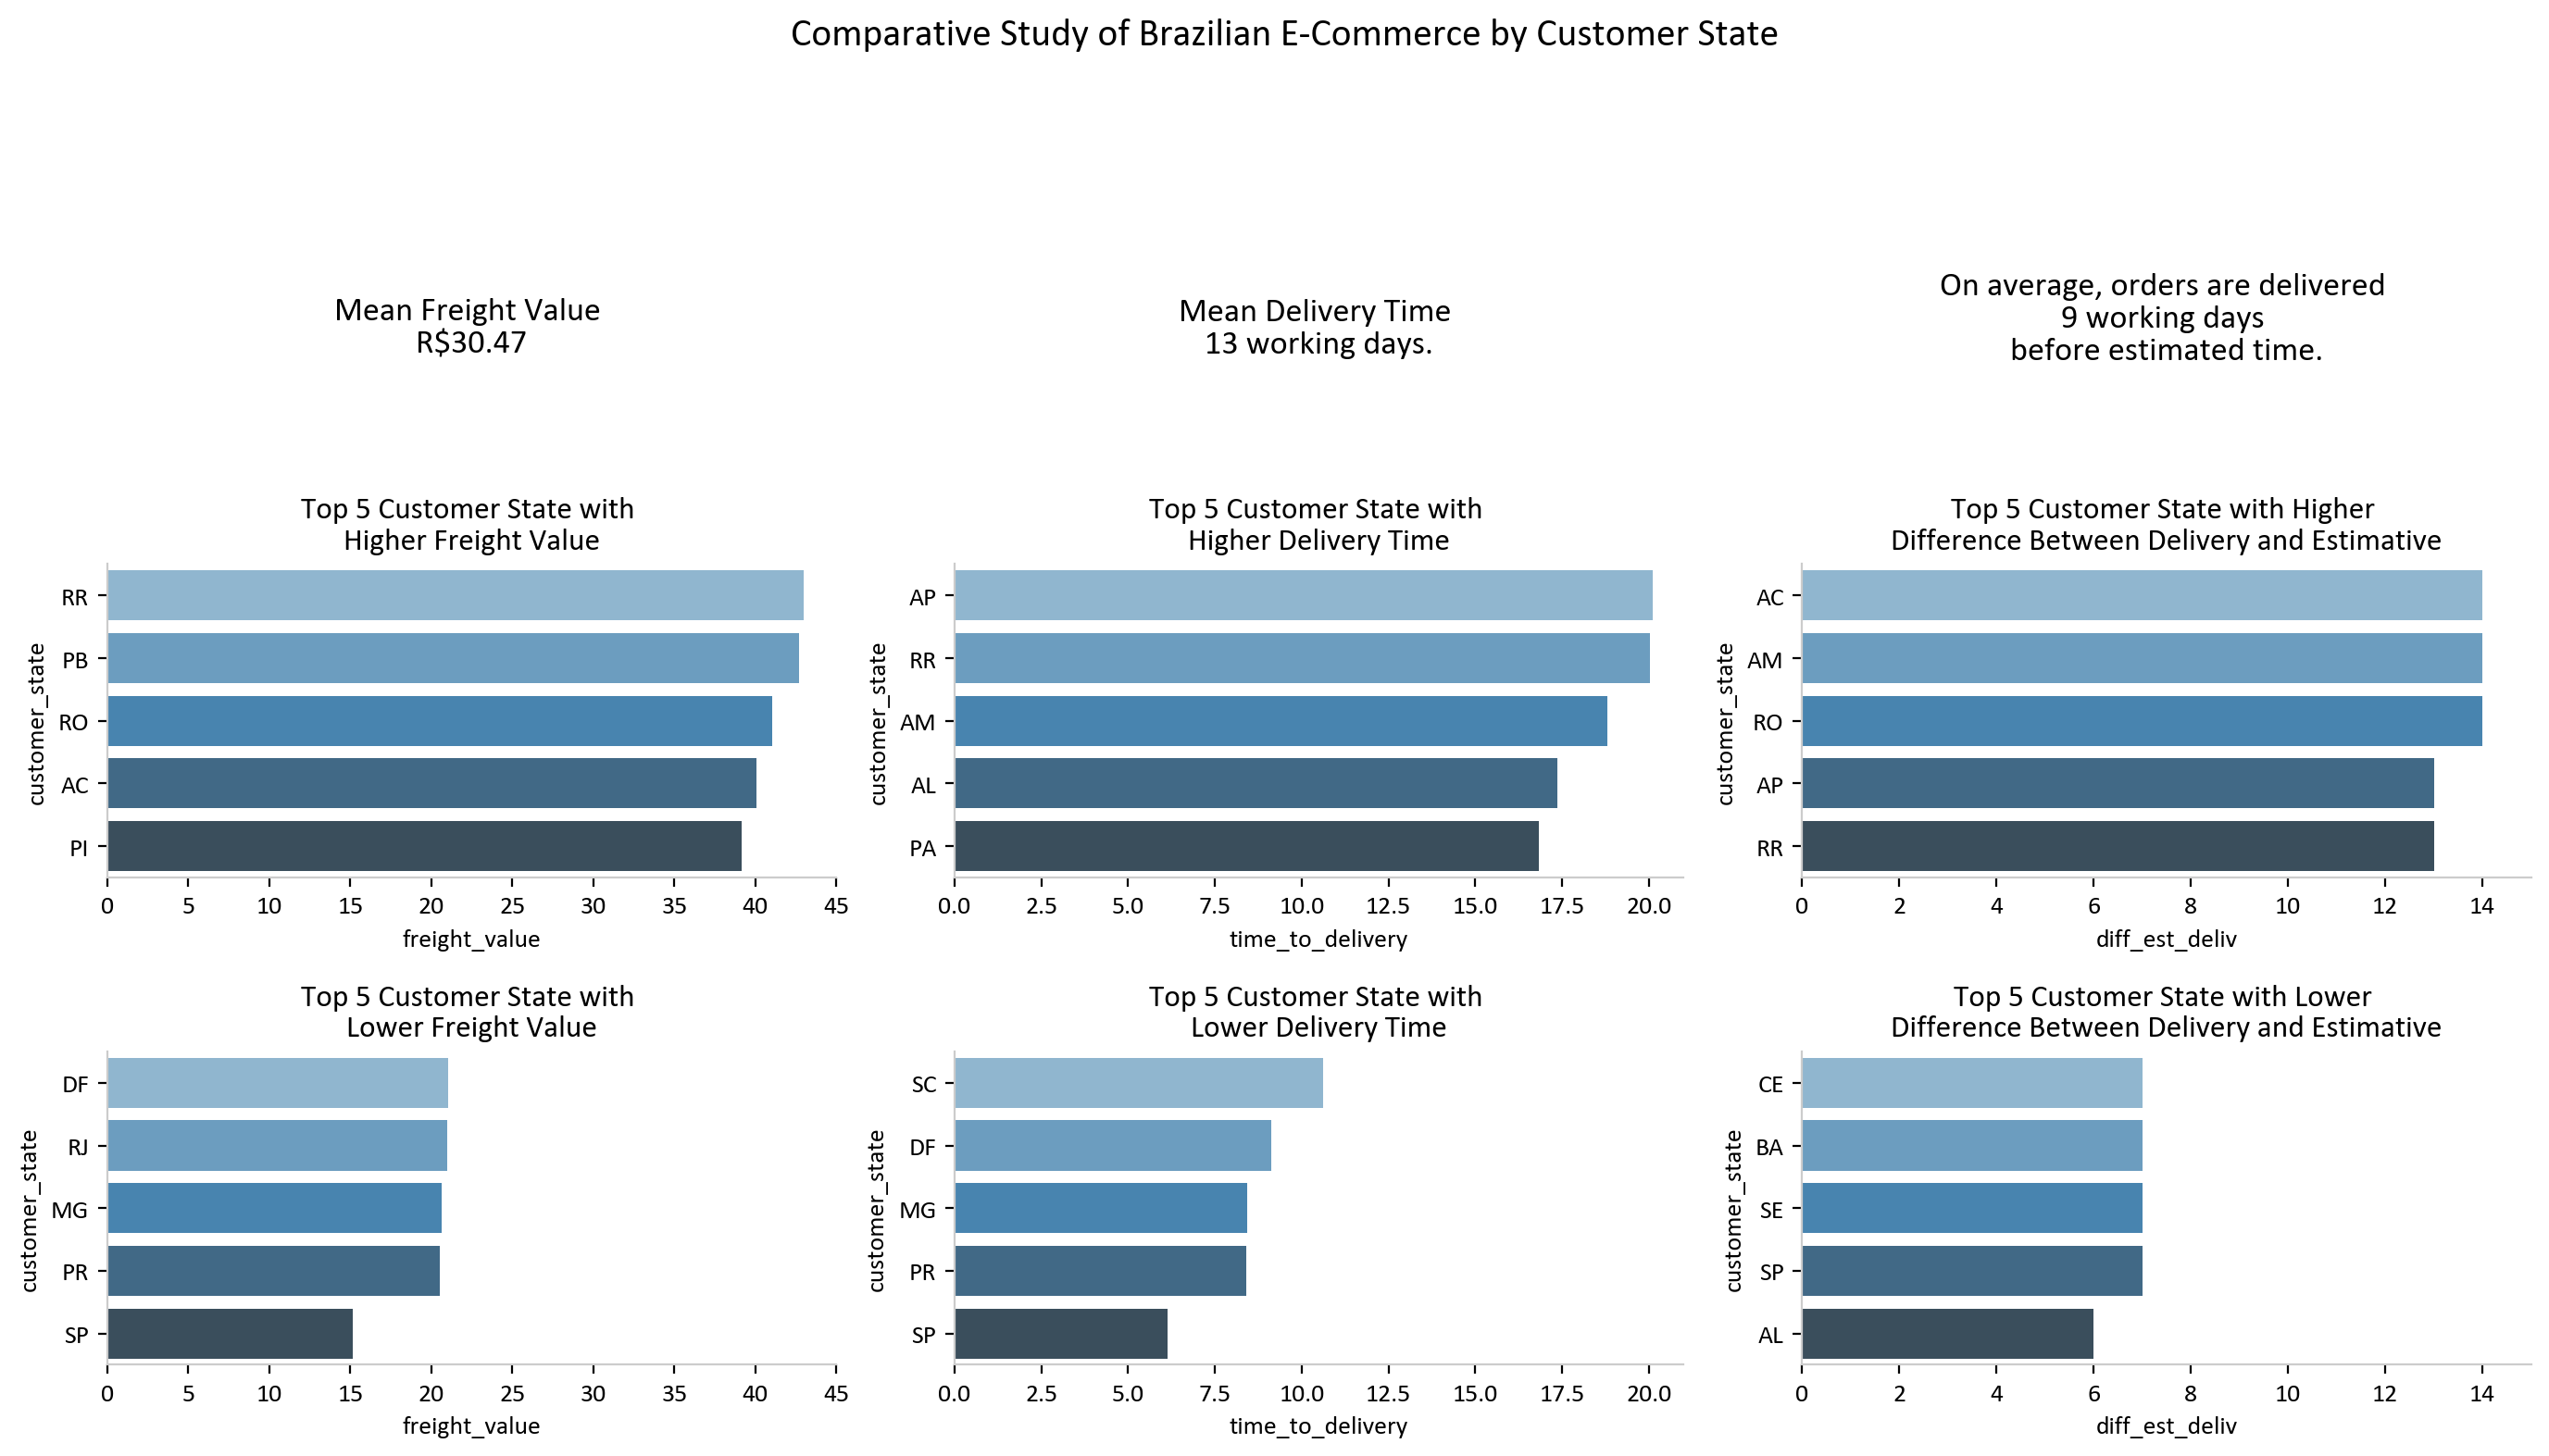

In [68]:
# Plot
fig, axs = plt.subplots(3, 3, figsize=(14, 8))
communicate_params(mean_freight_value, mean_delivery_time, mean_diff_estimative)

# Plot Freight Value
plot_param(df=df_mean_freight, col='freight_value', 
           title='Top 5 Customer State with \nHigher Freight Value', xlim=45, n_row=1, n_col=0)

# Plot Delivery Time
plot_param(df=df_delivery_time, col='time_to_delivery', 
           title='Top 5 Customer State with \nHigher Delivery Time', xlim=21, n_row=1, n_col=1)

# Plot Differece between delivery time and estimate time
plot_param(df=df_diff_est_deliv, col='diff_est_deliv', 
           title='Top 5 Customer State with Higher \nDifference Between Delivery and Estimative', 
           xlim=15, n_row=1, n_col=2)

plt.suptitle('Comparative Study of Brazilian E-Commerce by Customer State', size=15)
plt.tight_layout()
plt.show()

- Hasil Nilai Pengiriman
    - 5 Nilai Pengiriman Tertinggi: PR, PB, RO, AC, PI
    - 5 Nilai Pengiriman Terendah: DF, RJ, MG, PR, SP
- Hasil Waktu Pengiriman
    - 5 Waktu Pengiriman Tertinggi: AP, RR, AM, AL, PA
    - 5 Waktu Pengiriman Terendah: SC, DF, MG, PR, SP
- Hasil Perbedaan Waktu
    - 5 Perbedaan Waktu Tertinggi antara Pengiriman dan Estimasi: AC, AM, RO, AP, RR
    - 5 Perbedaan Waktu Terendah antara Pengiriman dan Estimasi: CE, BA, SE, SP, ALE, SP, AL

## Analysis by Payment Type

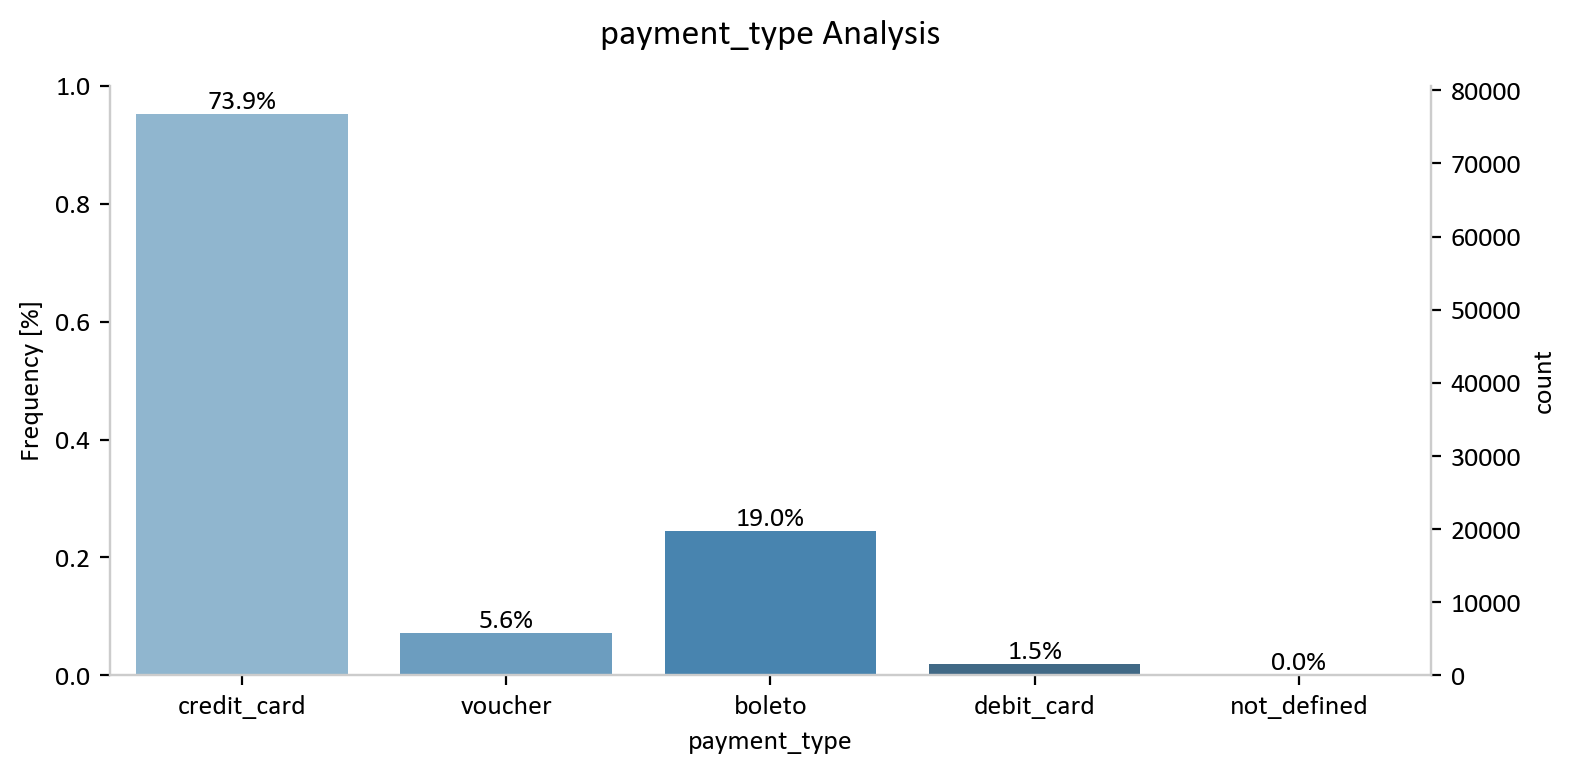

In [69]:
# Merging dataset with payment information
df_sales_payments = df_orders.merge(df_payments, on='order_id', how='inner')

fig, ax = plt.subplots(figsize=(8, 4))
count_plot(feature='payment_type', df=df_sales_payments)

Most customer use credit card as payment in ecommerce.

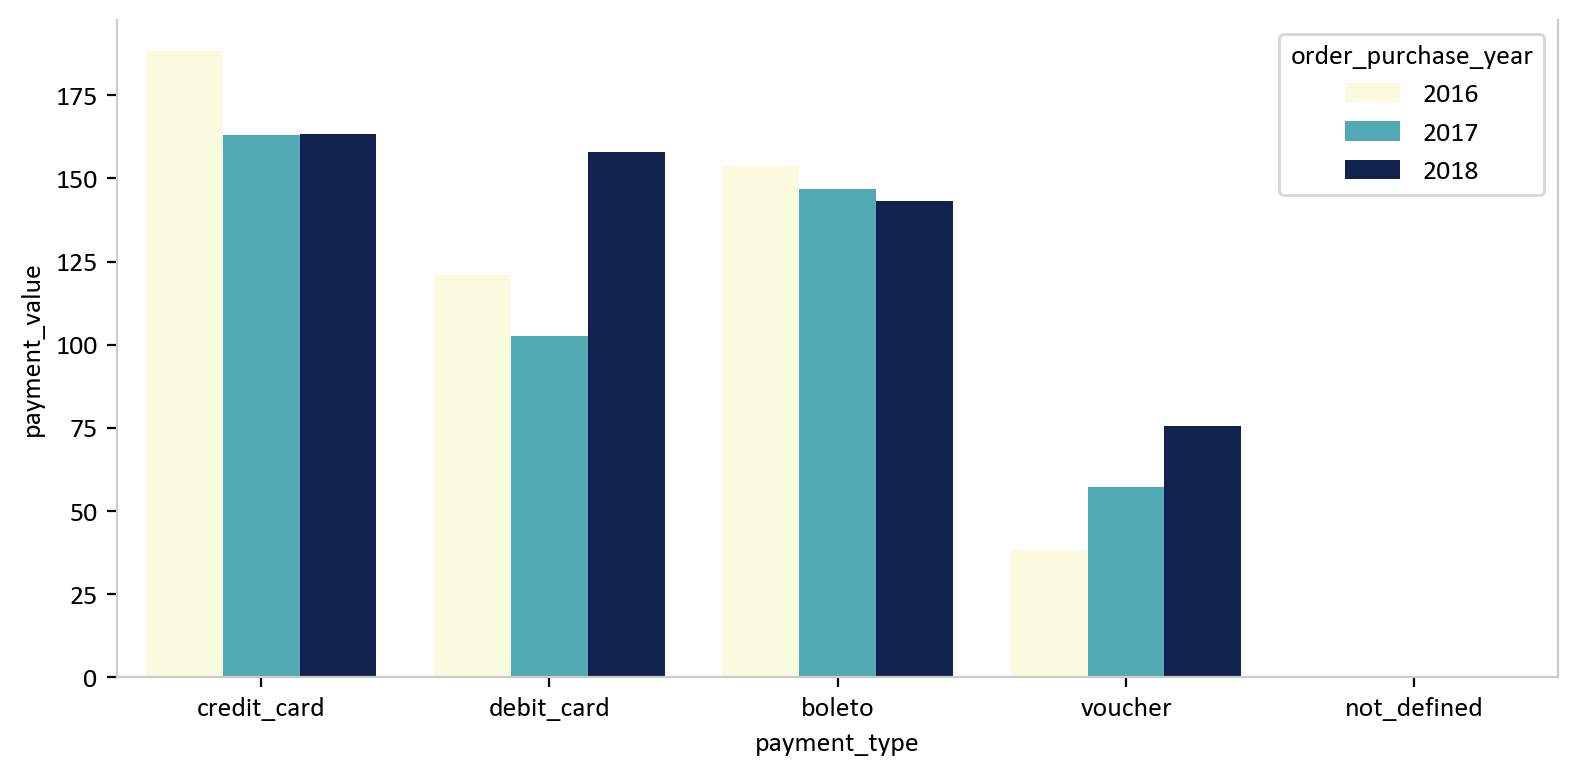

In [71]:
# Grouping data
df_payment_type_year = df_sales_payments.groupby(['order_purchase_year', 
                                                  'payment_type'], as_index=False).agg({'payment_value':'mean'})

df_payment_type_year = df_payment_type_year.sort_values(by='payment_value', ascending=False)



fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='payment_type', y='payment_value', data=df_payment_type_year, palette='YlGnBu', hue='order_purchase_year', ax=ax, ci=None)
format_spines(ax)
plt.tight_layout()


Seiring berjalannya waktu, orang cenderung menggunakan voucher dengan nilai yang lebih tinggi untuk pembayaran. Rata-rata jumlah yang dibayarkan dengan kartu debit juga meningkat pada tahun 2018.

## Analysis by Product Categories

In [74]:
# Merging data
df_order_products = df_orders_items.merge(df_products, on='product_id', how='inner')

# Sales counting
df_qtd_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).agg({'total_sales':'count'})


# Total sales
df_sales_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).agg({'total_sales':'sum'})


# Mean amount per product category
df_mean_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).agg({'total_sales':'mean'})

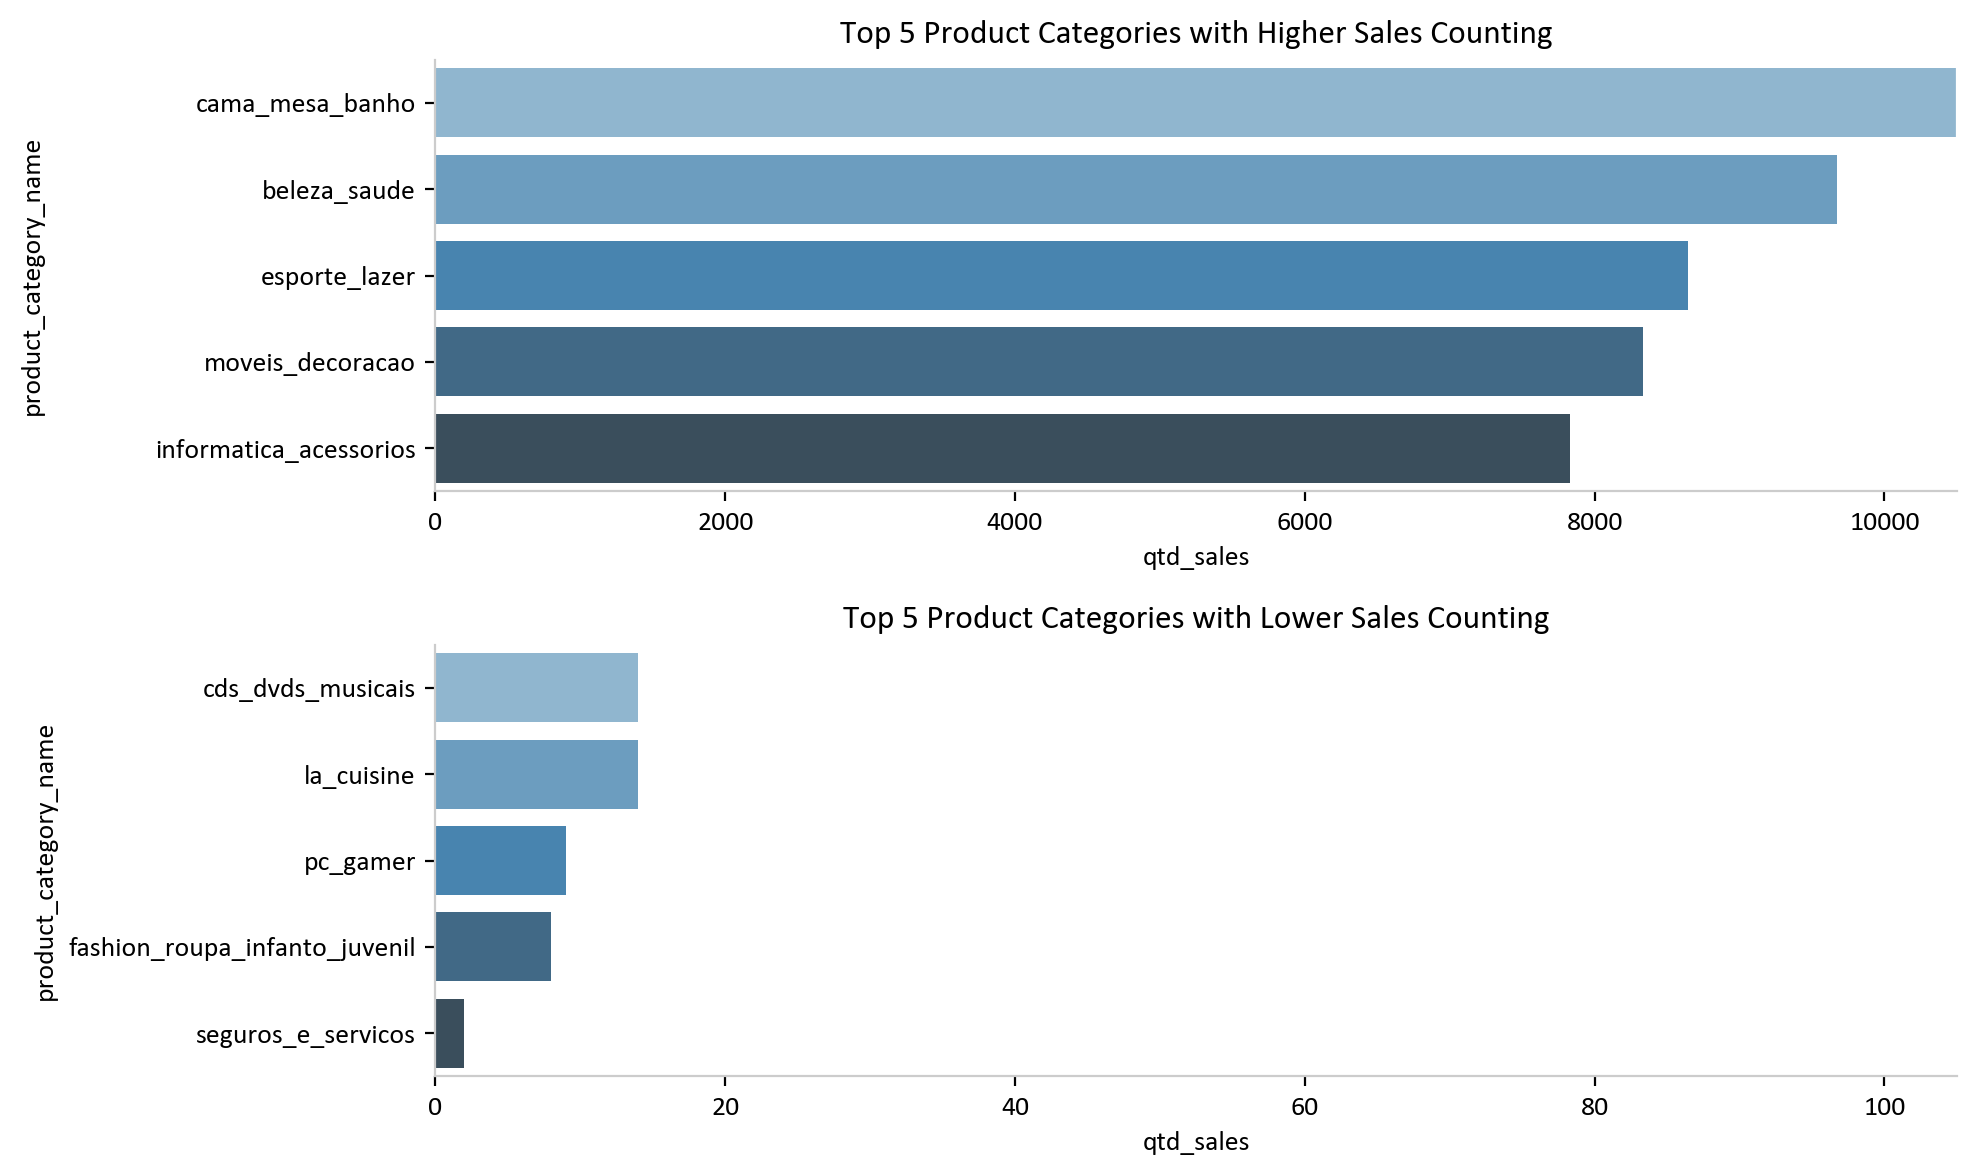

In [75]:
# Sales counting
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_qtd_product, col='total_sales', 
           title='Top 5 Product Categories with Higher Sales Counting',
           xlim=10500, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('qtd_sales')
axs[0].set_xlabel('qtd_sales')
axs[0].set_ylabel('product_category_name', labelpad=40)
plt.tight_layout()
plt.show()

cama_mesa_banho, beleza_saude, esporte_lazer, movies_decoracao, informatica_accesorios memiliki permintaan yang tinggi.

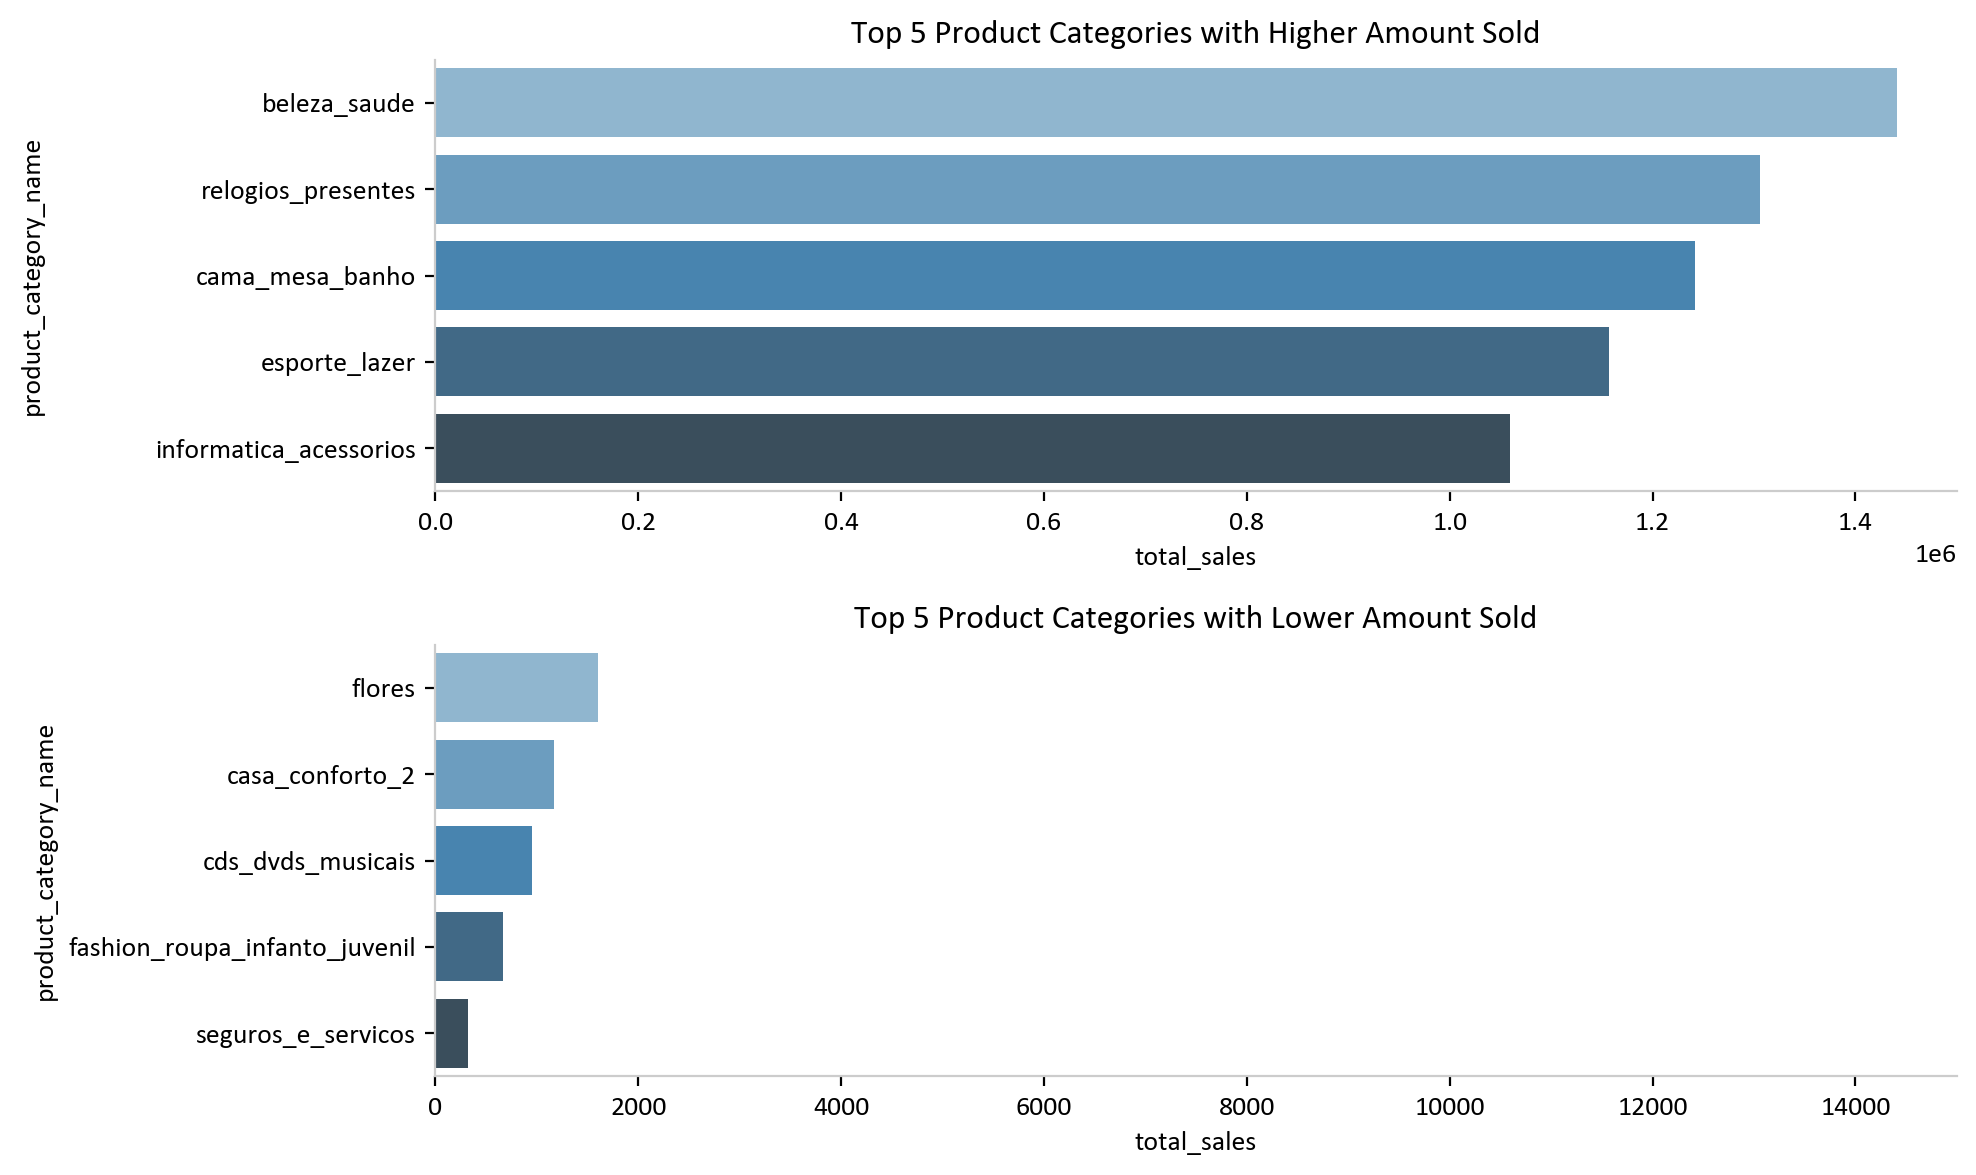

In [76]:
# Total amount of sales by product
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_sales_product, col='total_sales', 
           title='Top 5 Product Categories with Higher Amount Sold',
           xlim=1500000, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[0].set_ylabel('product_category_name', labelpad=40)
plt.tight_layout()
plt.show()

5 Kategori produk dengan nilai penjualan tertinggi, antara lain : 
- beleza_saude
- relogios_presents
- cama_mesa_banho
- esporte_lazer
- informatica_accesorios 

## Analysis by Review Score

In [77]:
# Merging datasets
df_ord_prod_cust = df_order_products.merge(df_customers, on='customer_id', how='inner')
df_info_reviews = df_ord_prod_cust.merge(df_reviews, on='order_id', how='inner')
idx_columns = ['order_id', 'order_purchase_year', 'total_sales',
               'product_category_name', 'customer_city', 'customer_state',
               'review_score']
df_info_reviews = df_info_reviews.loc[:, idx_columns]

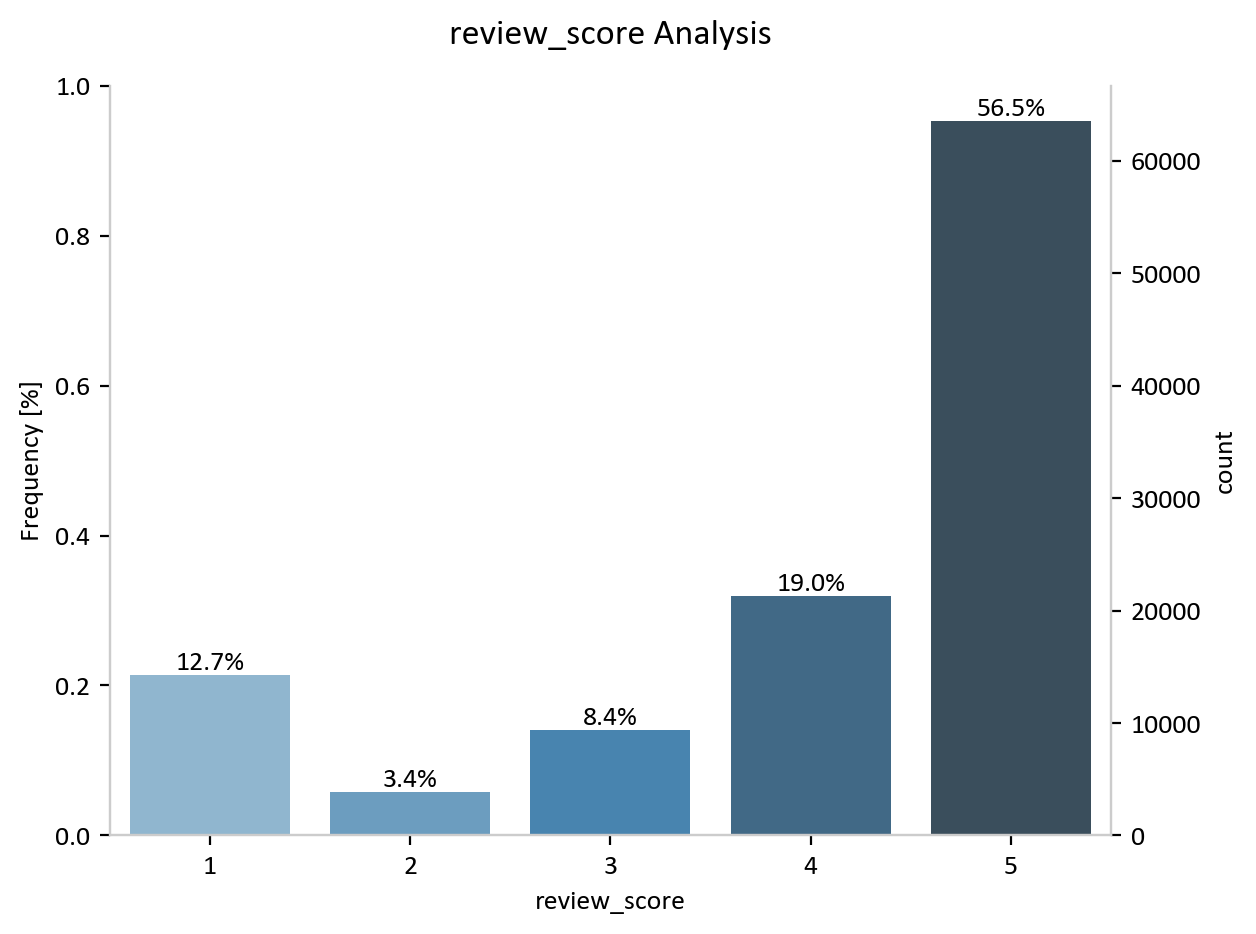

In [78]:
# Score counting
count_plot(feature='review_score', df=df_info_reviews)
plt.show()

Sebgian besar customer puas ketika berbelanja. Tetapi, 13% of customer memberikan poin 1. Perlu digali lebih dalam alasan customer tersebut memberi poin 1 tersebut.

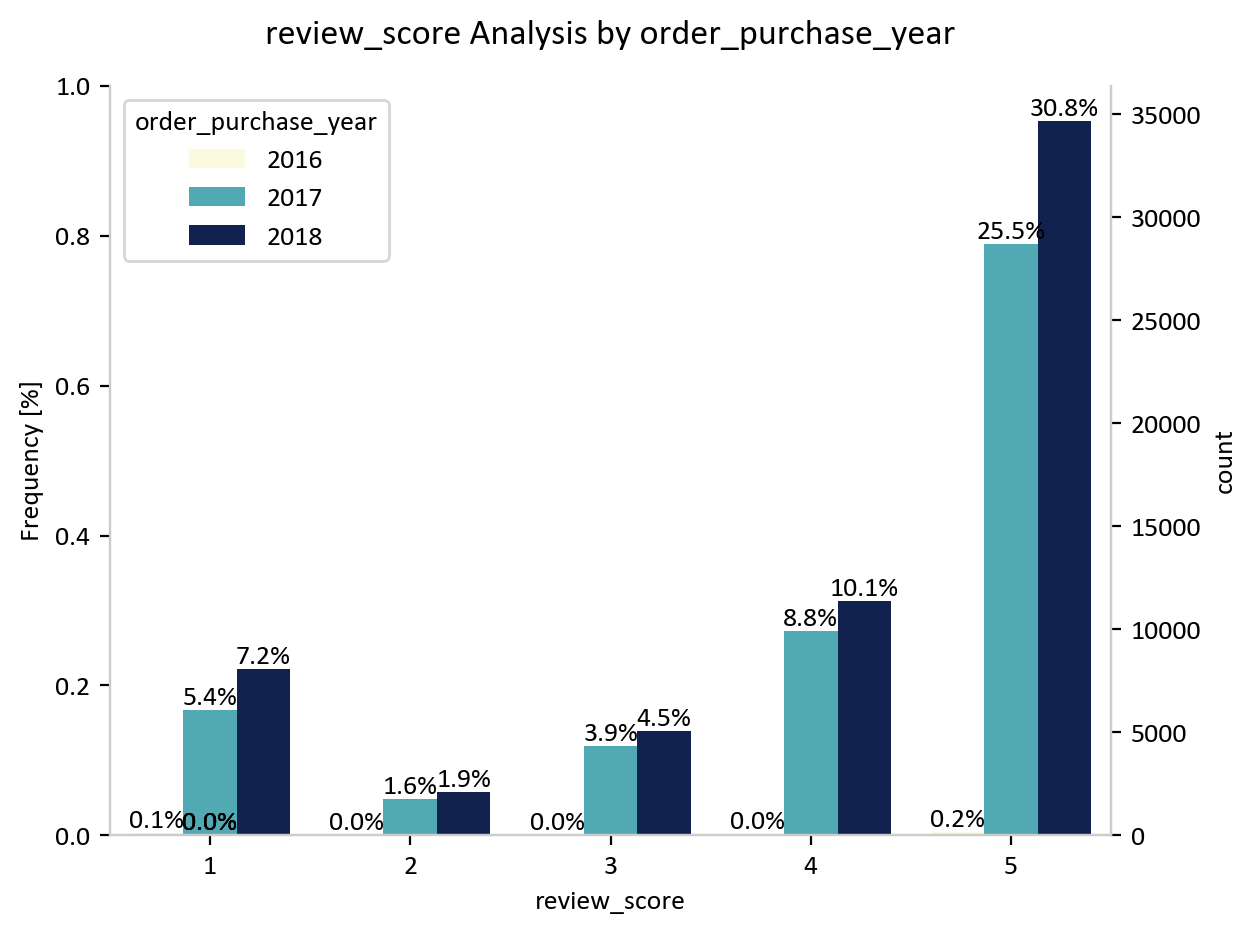

In [79]:
count_plot(feature='review_score', df=df_info_reviews,  hue='order_purchase_year', colors='YlGnBu')

Trends dari review scores mirip antara 2017 dan 2018.

In [80]:
# Mean review score
mean_review_score = df_info_reviews['review_score'].mean()
print(f'Mean customer review score: {mean_review_score:.2f}')

Mean customer review score: 4.03


Mean Review Score: 4.02

In [82]:
# Grouping by customer state
df_state_review = df_info_reviews.groupby(['customer_state'], as_index=False).agg({'review_score':'mean'})
df_state_review.sort_values('review_score', ascending=False, inplace=True)


# Grouping by product category
df_product_review = df_info_reviews.groupby(['product_category_name'], as_index=False).agg({'review_score':'mean'})
df_product_review.sort_values('review_score', ascending=False, inplace=True)

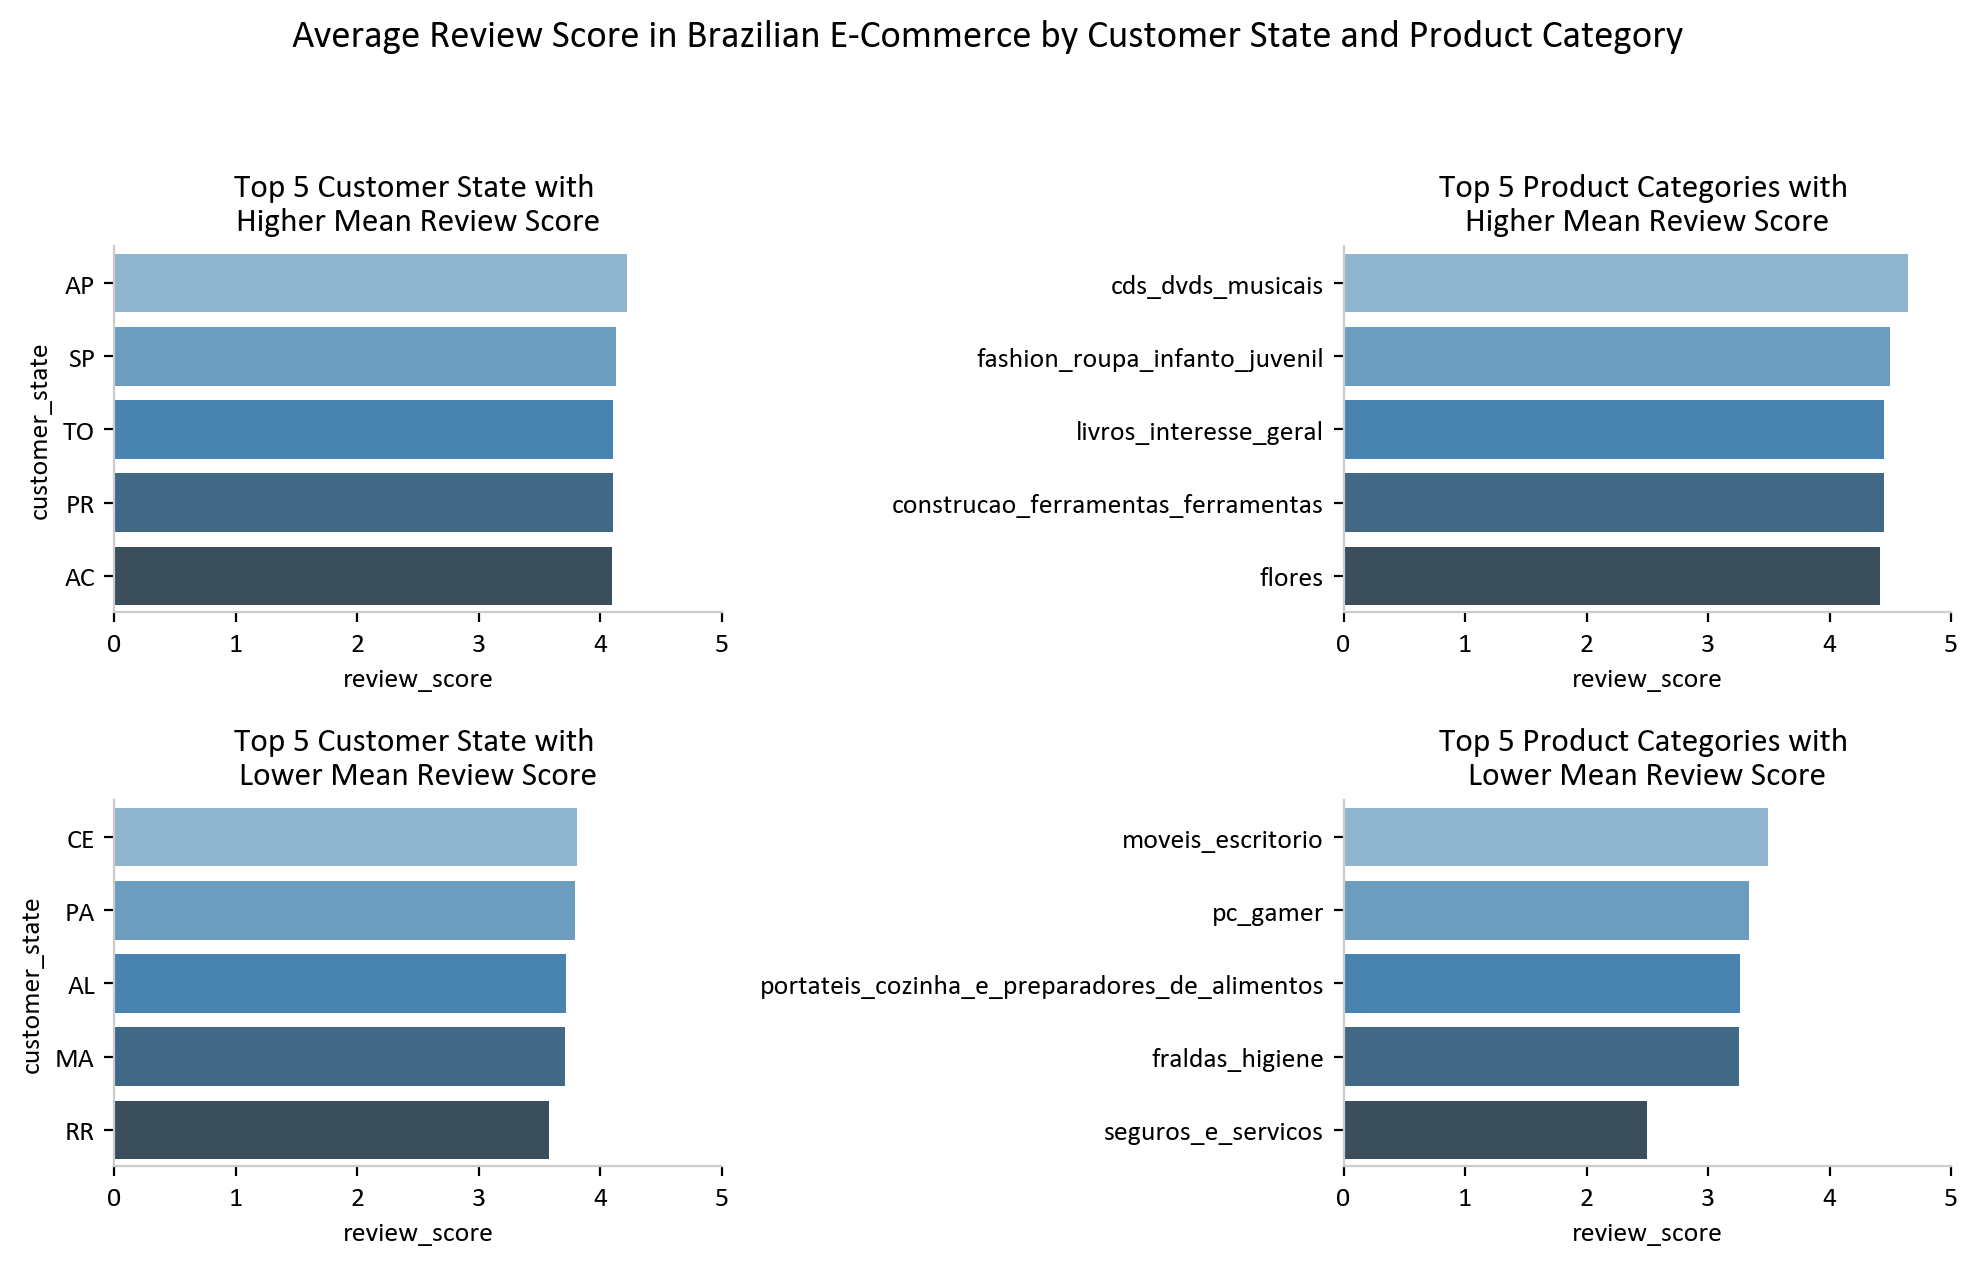

In [83]:
# Plotting data
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plot_param(df=df_state_review, col='review_score', y='customer_state',
           title='Top 5 Customer State with \nHigher Mean Review Score', xlim=5, n_row=0, n_col=0)
plot_param(df=df_product_review, col='review_score', y='product_category_name',
           title='Top 5 Product Categories with \nHigher Mean Review Score', xlim=5, 
           n_row=0, n_col=1)
axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')

plt.suptitle('Average Review Score in Brazilian E-Commerce by Customer State and Product Category', 
             y=1.05, size=14)
plt.tight_layout()
plt.show()

5 Customer State dengan rata - rata review score terendah : 
BA, PA, AL, MA, RR

Kemungkinan alasan mereka memberikan review score rendah :
- PA -> Long delivery time
- AL -> Long delivery time
- RR -> Long delivery time, difference between delivery and estimative is long
    
Dapat ditrack lebih dalam kenapa customer tersebut memberikan review rendah pada bagian review comments analysis.

## Conclusions

Dari kumpulan data penjualan Olist selama 3 tahun dan EDA yang dilakukan pada berbagai metrik bisnis di atas, berikut adalah wawasan yang ditarik:
- Olist telah melihat peningkatan pendapatan yang konsisten selama beberapa tahun terakhir, dengan penjualan tertinggi tercatat pada bulan November 2018.
- Olist memiliki rata-rata bulanan sebesar 8.657 pesanan yang ditempatkan di platform mereka.
- Kategori produk dengan Average Order Value (AOV) tertinggi adalah komputer, meskipun kategori ini tidak mendominasi dalam daftar penjualan atau jumlah pesanan.
- Bed_bath_table adalah kategori produk paling populer berdasarkan jumlah pesanan yang dibuat, diikuti oleh health_beauty dan sports_leisure.
- Meskipun kategori bed_bath_table memiliki jumlah pesanan tertinggi, hal ini tidak berarti memiliki rasio pendapatan terhadap jumlah pesanan yang lebih baik (yaitu AOV). Ini berarti pelanggan lebih banyak membeli item bed_bath_table tetapi menghabiskan lebih banyak uang rata-rata pada barang-barang mahal seperti komputer.
- Ada peningkatan yang konsisten dalam jumlah penjual yang bergabung dengan platform Olist. Ini menunjukkan bahwa Olist menjadi platform yang lebih populer dan menarik bagi penjual untuk mencapai pelanggan dan mengembangkan bisnis mereka.
- Peningkatan penjual aktif juga bisa mengarah pada variasi produk yang lebih besar yang dijual di Olist, yang bisa menarik bagi pelanggan dan potensial meningkatkan penjualan untuk pasar secara keseluruhan.
- Sebanyak 2997 pelanggan melakukan pembelian berulang. Sekitar 6% dari pelanggan berulang menyumbang total penjualan, yang merupakan angka rendah mengingat Olist memiliki total basis pelanggan sebesar 99441.
- Produk dengan rating tinggi menghasilkan pendapatan tertinggi dan menyumbang lebih dari 80% dari pesanan yang dibuat oleh pelanggan di platform Olist, yang menunjukkan kinerja penjualan yang baik dan bahwa pelanggan puas dengan pembelian mereka.
- Barang-barang paling mahal menduduki peringkat rendah, meskipun perusahaan mendapatkan AOV yang lebih baik pada barang-barang mahal. Hal ini menunjukkan bahwa pembeli lebih memprioritaskan produk dengan harga lebih murah dengan rating lebih baik, dan menghabiskan lebih banyak pada produk yang lebih mahal.
- Tingkat pembatalan pesanan rata-rata di Olist adalah 0,63% (Kurang dari 1%), yang merupakan indikator yang baik bahwa ada tingkat kepuasan pelanggan yang tinggi dan tingkat efisiensi platform
- Olist secara umum tinggi. Ini berarti, pelanggan menerima produk yang mereka pesan, dan ada sedikit masalah dengan seluruh proses pembelian. Ini dapat berpotensi mengarah pada peningkatan loyalitas pelanggan dan reputasi keseluruhan yang lebih baik untuk perusahaan, tetapi satu temuan kunci adalah bahwa tingkat retensi pelanggan rendah. Olist memiliki beberapa pekerjaan yang harus dilakukan dalam mengonversi pelanggan baru menjadi pelanggan yang setia, karena pelanggan mungkin memiliki pengalaman pembelian yang lebih baik dalam hal penawaran yang baik atau pengiriman yang lebih cepat dari pesaing.
- Jenis pembayaran yang paling sering digunakan oleh pelanggan Olist adalah kartu kredit yang menyumbang 74,3% dari total pembayaran, diikuti oleh boleto sebesar 19,16%.
Ada korelasi negatif antara skor ulasan dan rata-rata hari pengiriman. Semakin sedikit jumlah hari pengiriman, semakin tinggi skor ulasan dan sebaliknya.

## Recomendations

Berdasarkan analisis EDA yang dilakukan pada data penjualan Olist dan wawasan yang diperoleh setelah analisis, berikut adalah rekomendasi yang disarankan untuk platform e-commerce Olist untuk meningkatkan kinerja keseluruhan mereka dalam hal pesanan, pendapatan, skor ulasan, dan retensi pelanggan:

- Untuk memaksimalkan kinerja penjualan, profitabilitas, dan kepuasan pelanggan, Olist perlu dengan hati-hati menggunakan berbagai strategi penetapan harga, misalnya menggunakan strategi promosi penjualan silang untuk produk dengan AOV tinggi seperti komputer, dan produk teknologi untuk meningkatkan penjualan dan profitabilitas.
- Olist perlu menerapkan program loyalitas untuk membantu meningkatkan tingkat retensi pelanggan. Pelanggan tampaknya puas dengan pesanan mereka berdasarkan hasil tingkat pembatalan pesanan yang rendah. Olist harus memanfaatkan ini dengan menampilkan umpan balik positif dari pelanggan di platformnya untuk membantu menarik pelanggan baru dan potensial.
- Olist dapat menerapkan strategi penetapan harga dinamis untuk produk dengan margin keuntungan rendah seperti peralatan rumah tangga dengan menawarkan diskon selama periode yang lambat atau menaikkan harga selama musim sibuk untuk meningkatkan profitabilitas dan mengoptimalkan penjualan.
- Tingkat pembatalan pelanggan rendah dan tingkat retensi pelanggan juga rendah. Olist harus menggunakan strategi untuk meningkatkan tingkat retensi pelanggan dengan menampilkan lebih banyak variasi produk dan memperhatikan pengalaman layanan pelanggan mereka karena beberapa pelanggan mungkin merasa tidak puas dengan pengalaman layanan pelanggan mereka. Mereka juga harus menggunakan teknik diskon dan metode promosi penjualan lainnya seperti voucher atau cashback yang dapat digunakan dalam pembelian di masa depan yang dapat meningkatkan peluang pelanggan untuk melakukan pembelian di masa depan. Pelanggan mungkin telah mendapatkan penawaran dan promosi yang lebih baik dari pesaing.
- Untuk mendapatkan skor ulasan yang lebih tinggi, Olist perlu menerapkan strategi untuk melakukan pengiriman produk yang lebih cepat. Hal ini dapat dilakukan dengan menyederhanakan proses pemesanan, menghindari keterlambatan dalam pengiriman dan bottleneck transportasi, mempercepat pengiriman dengan memperluas gudang di berbagai wilayah.

Sekian analisis komprehensif tentang Platform e-Commerce Brasil - Olist untuk merencanakan penempatan produk dan meningkatkan kinerjanya secara keseluruhan dalam hal pesanan, pendapatan, skor ulasan, dan retensi pelanggan.